# Function transformer

In [1]:
"""
we hve 3 types of transformers 
i/ function transformers
ii/ power transformers
iii/ quantile transformers


Mathematical transformations
1/ log transform
2/ reciprocal transform
3/ power transform
4/ box-cox transform
5/ yeo-johnson transform


"""

'\nwe hve 3 types of transformers \ni/ function transformers\nii/ power transformers\niii/ quantile transformers\n\n\nMathematical transformations\n1/ log transform\n2/ reciprocal transform\n3/ power transform\n4/ box-cox transform\n5/ yeo-johnson transform\n\n\n'

In [2]:
# how to find if a data is normal ???

# why its imp to have normal distribution in data -- coz the more your data is normal, the more will be your accuracy

# to use distplot in seaborn to find wheather the data is normal distribution or not (PDF)
# to use pd.skew() function is pandas, if the ans is 0 then its normally distributed, if the ans is int +ve or -ve integers, then its not normally distributed
# to use 'qq plot' -- the more your line deviates from the green line that means the more you are deviated from the normal distribution
# to use 'log transform' -- cant be used on a -ve values, can only be used on +ve values (right skewed datas / right skewed normal distribution)
# to use 'x^2' -- more appropriate for left skewed normal distribution 
# to use 'reciprocal tranform' -- all the small values will be converted into bigger values and the biggle values will be converted into small values




This is qq plot

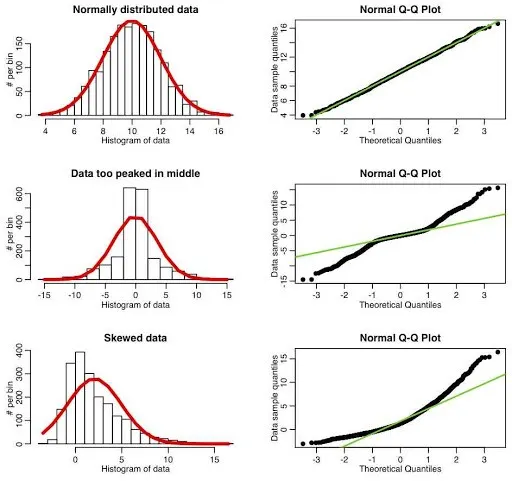

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats         # will be used to plot qq plot

from sklearn.model_selection import train_test_split, cross_val_score       # cross_val_score -- to do cross validation
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [4]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])
df['Age'] = df['Age'].fillna(df['Age'].mean())

print(df.isna().sum())

df.head()

Survived    0
Age         0
Fare        0
dtype: int64


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


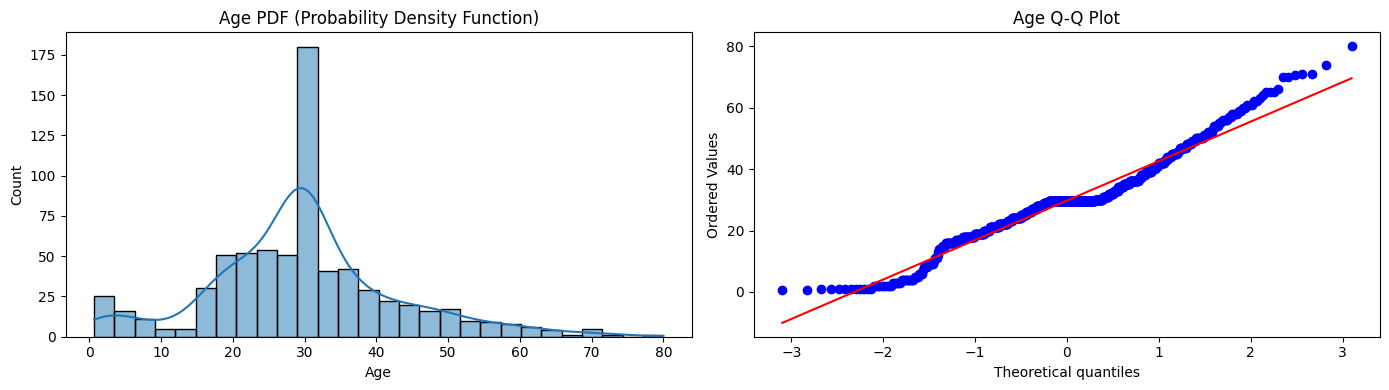

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['Survived']), df['Survived'], test_size=0.2, random_state=0)

# sns donot have inbuilt qq function
plt.figure(figsize=(14,4))          # width of 14 inches and height of 4 inches

plt.subplot(121)                # means 1 row, 2 columns, 1st plot
sns.histplot(x_train['Age'], kde=True)    # plots a histogram + kernel density estimate (KDE) for Age [  It shows how the Age values are distributed (e.g., normal, skewed, etc.) ]
plt.title('Age PDF (Probability Density Function)')

plt.subplot(122)                # 1 row, 2 columns, 2nd plot
stats.probplot(x_train['Age'], dist='norm', plot=plt)
plt.title('Age Q-Q Plot')

"""
stats.probplot(x_train['Age'], dist='norm', plot=plt)

Explanation:

1. stats.probplot():
   - This function (from scipy.stats) is used to generate the data needed
     for a Q-Q (Quantile-Quantile) plot.
   - A Q-Q plot helps check whether your data follows a particular theoretical
     distribution, such as the normal distribution.

2. dist='norm':
   - The parameter 'dist' specifies which theoretical distribution your data
     should be compared against.
   - 'norm' means Normal Distribution (Gaussian).
   - You can replace it with other distributions like   'expon',   'uniform',   etc.
   - If the points in the plot lie approximately on a straight line,
     it indicates that the data is roughly normally distributed.

3. plot=plt:
   - This tells the function to draw the Q-Q plot using Matplotlib's pyplot.
   - Without this, stats.probplot() would only return numerical data and not plot it.

In summary:
This line compares the quantiles of your 'Age' data against the quantiles
of a normal distribution and then visualizes the comparison using matplotlib.
"""




plt.tight_layout()
plt.show()


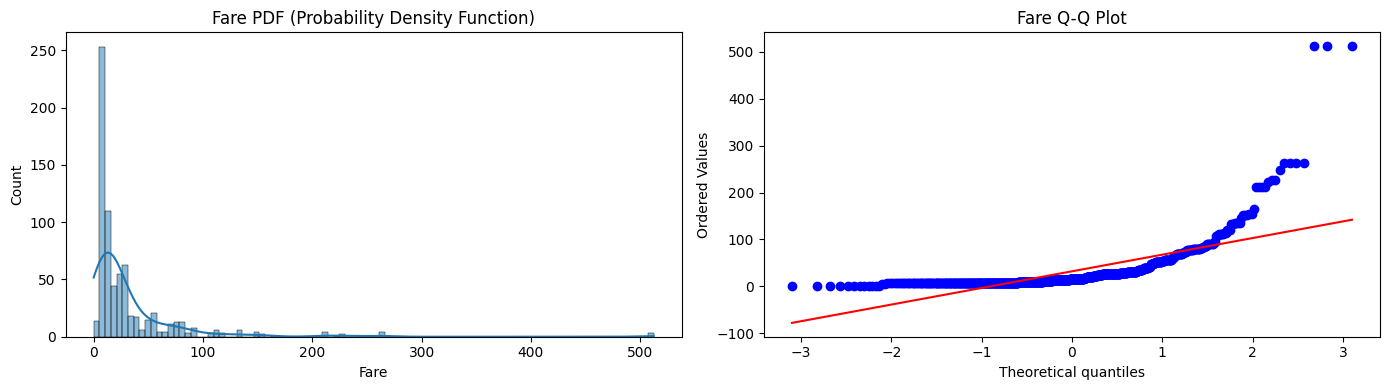

In [6]:
x = df.drop(columns=['Survived'])
y = df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# sns donot have inbuilt qq function
plt.figure(figsize=(14,4))          # width of 14 inches and height of 4 inches

plt.subplot(121)                
sns.histplot(x_train['Fare'], kde=True)    
plt.title('Fare PDF (Probability Density Function)')


plt.subplot(122)               
stats.probplot(x_train['Fare'], dist='norm', plot=plt)
plt.title('Fare Q-Q Plot')


plt.tight_layout()
plt.show()


In [7]:
reg = LogisticRegression()
clf = DecisionTreeClassifier()

reg.fit(x_train, y_train)
y_pred_1 = reg.predict(x_test)

clf.fit(x_train, y_train)
y_pred_2 = clf.predict(x_test)

print(f"ACCURACY (Logistic Regression): {np.round(accuracy_score(y_test, y_pred_1), 2)*100} %")
print(f"ACCURACY (Decistion Tree Classifier): {np.round(accuracy_score(y_test, y_pred_2), 2)*100} %")



ACCURACY (Logistic Regression): 70.0 %
ACCURACY (Decistion Tree Classifier): 66.0 %


### Using Function Transformer

In [8]:
# using log in the data

# making an object that converts data into log values
trf = FunctionTransformer(func=np.log1p)
# np.log -- it can find the log of the numbers, if the data contains 0, then it will make a mess
# np.log1p -- it can also find  the log, what it does is, it first adds 1 into the data and then finds log. So if any value has 0 as data, it will still be of no issue

# transforming x_train and x_test data using log1p
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.transform(x_test)

reg = LogisticRegression()
clf = DecisionTreeClassifier()

reg.fit(x_train_transformed, y_train)
y_pred_1 = reg.predict(x_test)

clf.fit(x_test_transformed, y_test)
y_pred_2 = reg.predict(x_test)



print(f"ACCURACY (Logistic Regression): {np.round(accuracy_score(y_test, y_pred_1), 2)*100} %")
print(f"ACCURACY (Decistion Tree Classifier): {np.round(accuracy_score(y_test, y_pred_2), 2)*100} %")

# as we can see the there is a hike in accuracy after converting the data into the log values


ACCURACY (Logistic Regression): 73.0 %
ACCURACY (Decistion Tree Classifier): 73.0 %


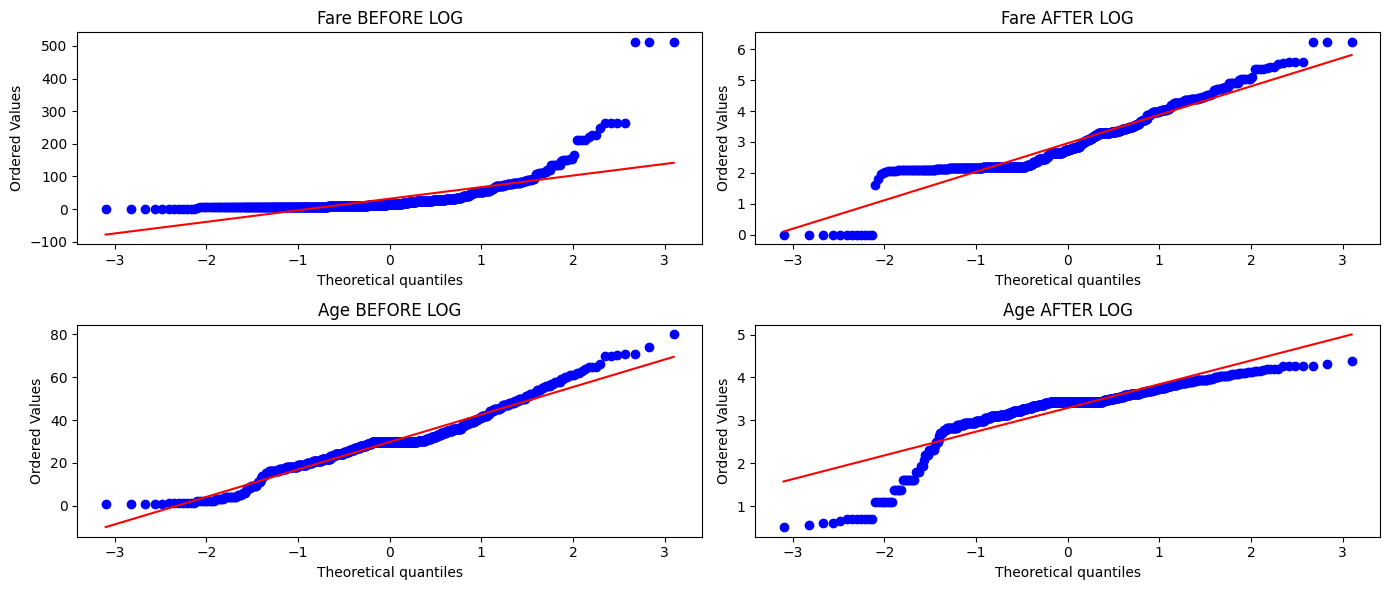

In [9]:
# plotting the distribution of fair, before and after log

plt.figure(figsize=(14,6))

# Fare before and after log
plt.subplot(221)
stats.probplot(x_train['Fare'], dist='norm', plot=plt)
plt.title('Fare BEFORE LOG')

plt.subplot(222)
stats.probplot(x_train_transformed['Fare'], dist='norm', plot=plt)
plt.title('Fare AFTER LOG')

# Age before and after log
plt.subplot(223)
stats.probplot(x_train['Age'], dist='norm', plot=plt)
plt.title('Age BEFORE LOG')

plt.subplot(224)
stats.probplot(x_train_transformed['Age'], dist='norm', plot=plt)
plt.title('Age AFTER LOG')

plt.tight_layout()
plt.show()

# as we can see down below we have seen improvement on Fare, but the Age has deviated from normal distribution
# this is bcoz age was not right skewed, rather it was properly skewed, and still we applied log on it, hence the distribution has deviated


In [10]:
# makig cross validation

x_transformed = trf.fit_transform(x)

reg = LogisticRegression()
clf = DecisionTreeClassifier()

print('LR', np.mean(cross_val_score(reg, x_transformed, y, scoring='accuracy', cv=10)))
print('DT', np.mean(cross_val_score(clf, x_transformed, y, scoring='accuracy', cv=10)))
# cross_val_score -- It is used to check how well your model performs on different splits of the data, not just one train-test split.



LR 0.678027465667915
DT 0.6565792759051186


Accuracy: 0.6431335830212235


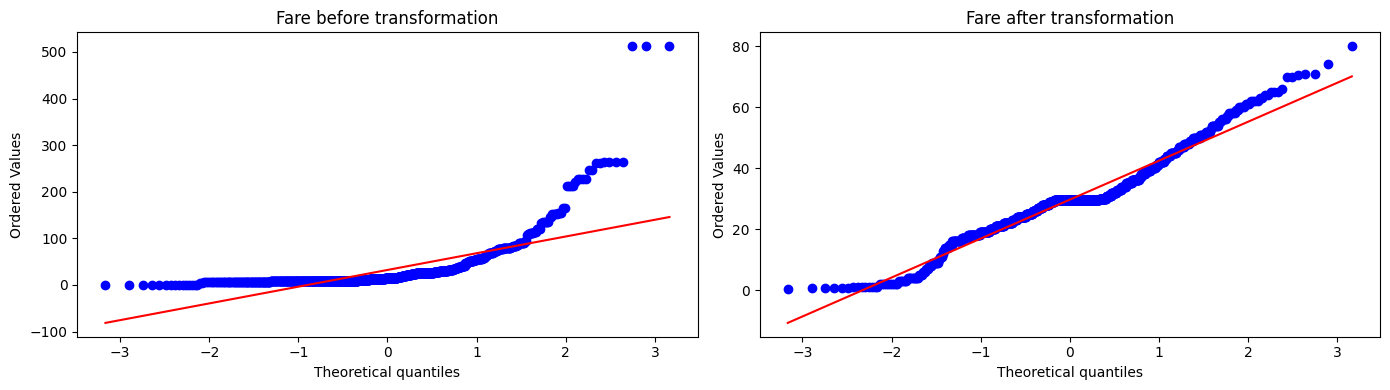

In [11]:
# making a function of your own, so that rather than using library provided functions like log, you can use your own made functions (formulas)

def apply_transform(transform):
    x = df.iloc[:, 1:3]
    y = df.iloc[:, 0]

    trf = ColumnTransformer([
        ('log', FunctionTransformer(transform), ['Fare'])
    ], remainder='passthrough')

    x_trans = trf.fit_transform(x)

    # convert x_trans to DataFrame
    x_trans = pd.DataFrame(x_trans, columns=x.columns, index=x.index)

    clf = LogisticRegression()
    print('Accuracy:', np.mean(cross_val_score(clf, x_trans, y, scoring='accuracy', cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(x['Fare'], dist='norm', plot=plt)
    plt.title('Fare before transformation')

    plt.subplot(122)
    stats.probplot(x_trans['Fare'], dist='norm', plot=plt)
    plt.title('Fare after transformation')

    plt.tight_layout()
    plt.show()


apply_transform(lambda x: x**2)
